# Estimation of a Sinusoidal Signal with Noise

### Estimación de una señal sinusoidal con ruido con el modelo de un polinomio de orden 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
A = 10
f0 = 1/N
phi = np.pi/4
sigma = 1
n = np.arange(N).reshape(-1,1)

### Se genera la matriz H

In [2]:
H = np.array([n**0, n**1, n**2, n**3, n**4, n**5])
H = H.reshape((6, 20))
H = np.transpose(H)

print(H)
print(H.shape)

[[      1       0       0       0       0       0]
 [      1       1       1       1       1       1]
 [      1       2       4       8      16      32]
 [      1       3       9      27      81     243]
 [      1       4      16      64     256    1024]
 [      1       5      25     125     625    3125]
 [      1       6      36     216    1296    7776]
 [      1       7      49     343    2401   16807]
 [      1       8      64     512    4096   32768]
 [      1       9      81     729    6561   59049]
 [      1      10     100    1000   10000  100000]
 [      1      11     121    1331   14641  161051]
 [      1      12     144    1728   20736  248832]
 [      1      13     169    2197   28561  371293]
 [      1      14     196    2744   38416  537824]
 [      1      15     225    3375   50625  759375]
 [      1      16     256    4096   65536 1048576]
 [      1      17     289    4913   83521 1419857]
 [      1      18     324    5832  104976 1889568]
 [      1      19     361    68

#### Nota: Ya que en el enunciado del problema se define $s[n]=\sum_{k=0}^{5}a_{k}n^{k}$ desde n=0 y k=0, para este caso se tiene:  $a_{k}n^{k}\rightarrow s[0]=a_{0}0^{0}\rightarrow0^{0}=?$, valor que matemáticamente es indefinido, se toma el valor estimado por python de $0^{0}=1$

### Se ejecuta el algoritmo 1000 veces y se estiman los valores de $a_{k}$

In [3]:
K = 1000
a_k_est = np.zeros([K,6])

for i in range(K):
    w_n = (sigma*np.random.randn(N)).reshape(-1,1)
    x_n = A*np.cos(2*np.pi*f0*n + phi) + w_n
    
    a_k_est[i] = (np.linalg.inv((np.transpose(H) @ H))@ np.transpose(H) @ x_n).flatten()
    

## Estadísticas de $a_0$

#### Media de $a_0$

In [4]:
np.mean(a_k_est[:,0])

-6.496305737330858

#### Varianza de $a_0$

In [5]:
np.var(a_k_est[:,0])

0.19034533294701964

#### Histograma de $a_0$

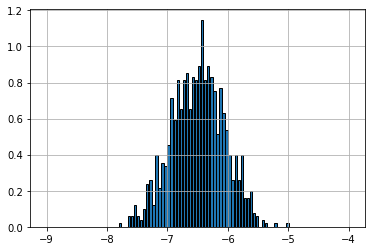

In [6]:
xrange = [-9,-4]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(a_k_est[:,0],bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

## Estadísticas de $a_1$

#### Media de $a_1$

In [7]:
np.mean(a_k_est[:,1])

0.8274265035513613

#### Varianza de $a_1$

In [8]:
np.var(a_k_est[:,1])

0.0016908388046840991

#### Histograma de $a_1$

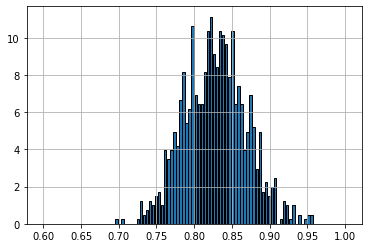

In [9]:
xrange = [0.6, 1]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(a_k_est[:,1],bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

## Estadísticas de $a_2$

#### Media de $a_2$

In [10]:
np.mean(a_k_est[:,2])

-0.0018921409709083945

#### Varianza de $a_2$

In [11]:
np.var(a_k_est[:,2])

2.4864025028534364e-08

#### Histograma de $a_2$

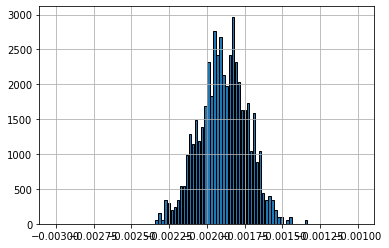

In [12]:
xrange = [-0.003,-0.001]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(a_k_est[:,2],bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

## Estadísticas de $a_3$

#### Media de $a_3$

In [13]:
np.mean(a_k_est[:,3])

-0.0001750690740940463

#### Varianza de $a_3$

In [14]:
np.var(a_k_est[:,3])

1.0918118891574165e-10

#### Histograma de $a_3$

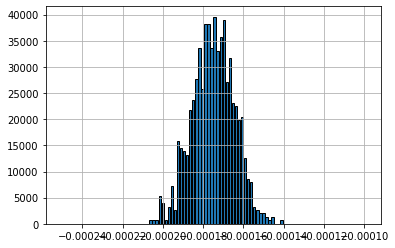

In [15]:
xrange = [-0.00025,-0.0001]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(a_k_est[:,3],bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

## Estadísticas de $a_4$

#### Media de $a_4$

In [16]:
np.mean(a_k_est[:,4])

-1.4506017693203786e-05

#### Varianza de $a_4$

In [17]:
np.var(a_k_est[:,4])

4.583963493832325e-13

#### Histograma de $a_4$

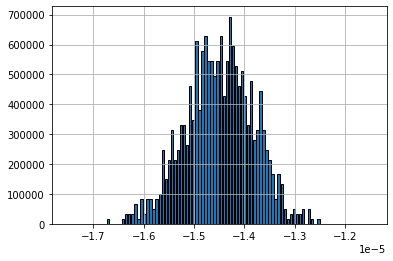

In [18]:
xrange = [-1.750e-05,-1.15e-05]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(a_k_est[:,4],bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

## Estadísticas de $a_5$

#### Media de $a_5$

In [19]:
np.mean(a_k_est[:,5])

-8.702835161454866e-07

#### Varianza de $a_5$

In [20]:
np.var(a_k_est[:,5])

1.222288656211914e-15

#### Histograma de $a_5$

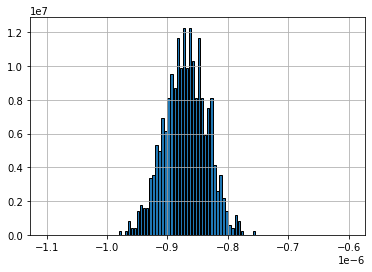

In [21]:
xrange = [-11e-07,-6e-07]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(a_k_est[:,5],bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

### Estimación de una señal sinusoidal con ruido con el modelo de suma de sinusoides

### Se genera la matriz H

In [22]:
H = np.array([np.cos(2*np.pi*f0*n), np.sin(2*np.pi*f0*n)])
H =  H.reshape((2, 20))
H = np.transpose(H)
print(H.shape)
print(H)

(20, 2)
[[ 1.00000000e+00  0.00000000e+00]
 [ 9.51056516e-01  3.09016994e-01]
 [ 8.09016994e-01  5.87785252e-01]
 [ 5.87785252e-01  8.09016994e-01]
 [ 3.09016994e-01  9.51056516e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-3.09016994e-01  9.51056516e-01]
 [-5.87785252e-01  8.09016994e-01]
 [-8.09016994e-01  5.87785252e-01]
 [-9.51056516e-01  3.09016994e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-9.51056516e-01 -3.09016994e-01]
 [-8.09016994e-01 -5.87785252e-01]
 [-5.87785252e-01 -8.09016994e-01]
 [-3.09016994e-01 -9.51056516e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 3.09016994e-01 -9.51056516e-01]
 [ 5.87785252e-01 -8.09016994e-01]
 [ 8.09016994e-01 -5.87785252e-01]
 [ 9.51056516e-01 -3.09016994e-01]]


### Se ejecuta el algoritmo 1000 veces y se estiman los valores de $B_{est}$ y $C_{est}$

In [23]:
K = 1000
B_C_est = np.zeros([K,2])

for i in range(K):
    w_n = (sigma*np.random.randn(N)).reshape(-1,1)
    x_n = A*np.cos(2*np.pi*f0*n + phi) + w_n
    
    B_C_est[i] = (np.linalg.inv((np.transpose(H) @ H))@ np.transpose(H) @ x_n).flatten()
    
B_est = B_C_est[:,0]
C_est = B_C_est[:,1]

## Estadísticas de $A_{est}$ y $\phi_{est}$

In [24]:
A_est = np.sqrt(B_est**2 + C_est**2)
phi_est = np.arctan(-B_est/C_est)

#### Media de $A_{est}$

In [25]:
np.mean(A_est)

9.993292497021304

#### Varianza de $A_{est}$

In [26]:
np.var(A_est)

0.09662864812604934

#### Histograma de$A_{est}$

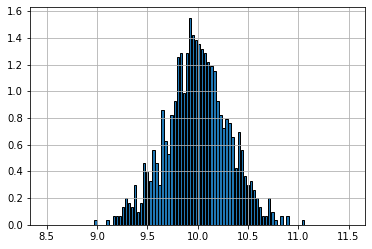

In [27]:
xrange = [8.5,11.5]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(A_est,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

#### Media de $\phi_{est}$

In [28]:
np.mean(phi_est)

0.7867533041243994

$\pi / 4 = 0.78539$

#### Varianza de $\phi_{est}$

In [29]:
np.var(phi_est)

0.0009599586729667531

#### Histograma de $\phi_{est}$

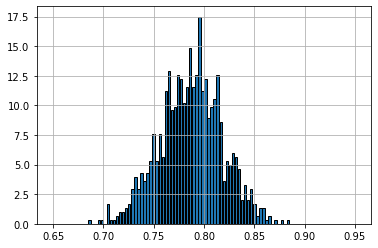

In [30]:
xrange = [0.65,0.95]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(phi_est,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

### Se comparan polinomios de diferente orden

#### para n = 2

In [31]:
N = 20
A = 10
f0 = 1/N
phi = np.pi/4
sigma = 1

n = np.arange(N).reshape(-1,1)
H = np.array([n**0, n**1])
H = H.reshape((2, 20))
H = np.transpose(H)

K = 1000
a_k_est = np.zeros([K,2])

for i in range(K):
    w_n = (sigma*np.random.randn(N)).reshape(-1,1)
    x_n = A*np.cos(2*np.pi*f0*n + phi) + w_n
    
    a_k_est[i] = (np.linalg.inv((np.transpose(H) @ H))@ np.transpose(H) @ x_n).flatten()

In [32]:
print ('Varianza para a_0')
print(np.var(a_k_est[:,0]))
print ('Varianza para a_1')
print(np.var(a_k_est[:,1]))

Varianza para a_0
0.17783450505098067
Varianza para a_1
0.0013965763623825923


#### para n = 10

In [33]:
N = 20
A = 10
f0 = 1/N
phi = np.pi/4
sigma = 1

n = np.arange(N).reshape(-1,1)
H = np.array([n**0, n**1, n**2, n**3, n**4, n**5, n**6, n**7, n**8, n**9])
H = H.reshape((10, 20))
H = np.transpose(H)

K = 1000
a_k_est = np.zeros([K,10])

for i in range(K):
    w_n = (sigma*np.random.randn(N)).reshape(-1,1)
    x_n = A*np.cos(2*np.pi*f0*n + phi) + w_n
    
    a_k_est[i] = (np.linalg.inv((np.transpose(H) @ H))@ np.transpose(H) @ x_n).flatten()

In [34]:
print ('Varianza para a_0')
print(np.var(a_k_est[:,0]))
print ('Varianza para a_1')
print(np.var(a_k_est[:,1]))
print ('Varianza para a_2')
print(np.var(a_k_est[:,2]))
print ('Varianza para a_3')
print(np.var(a_k_est[:,3]))
print ('Varianza para a_4')
print(np.var(a_k_est[:,4]))
print ('Varianza para a_5')
print(np.var(a_k_est[:,5]))
print ('Varianza para a_6')
print(np.var(a_k_est[:,6]))
print ('Varianza para a_7')
print(np.var(a_k_est[:,7]))
print ('Varianza para a_8')
print(np.var(a_k_est[:,8]))
print ('Varianza para a_9')
print(np.var(a_k_est[:,9]))

Varianza para a_0
2.4555339426977563
Varianza para a_1
1.2202342866305371
Varianza para a_2
0.4994990040087262
Varianza para a_3
0.08191535099524964
Varianza para a_4
0.3369995156478609
Varianza para a_5
0.5572209371226572
Varianza para a_6
0.33916228361663664
Varianza para a_7
0.03361020236141322
Varianza para a_8
0.2678830721539837
Varianza para a_9
1.461308828788057


### A mayor orden puede llegar a incrementar la varianza y generar overfitting, no se puede incrementar el orden indefinidamente, se debe buscar aquel en el cual se reduzca el error de estimación. Del mismo modo, si el orden es muy bajo puede generar underfitting.

### Para el modelo de datos sinusoidal

### En base a los datos obtenidos, la distribución de los histogramas tienen las siguientes distribuciones:

### Distribución de $A_{est}$

$ A_{est} \sim \mathcal{N}(9.993,\,0.096)$

### Distribución de $\phi_{est}$

$ \phi_{est} \sim \mathcal{N}(0.7867,\,0.0009)$

### Además, en base a la correlación

In [35]:
print(np.correlate(A_est, phi_est))

[7862.04918064]


### Se oberva que son altamente correlacionados, ya que son linealmente dependientes. Para reducir la correlación se debe reducir la diferencia entre las variables.